In [3]:
import nilearn.image as ni
import nibabel as nb
from nilearn.plotting import plot_anat, plot_prob_atlas, show
import SimpleITK as sitk
from utils import pad_nifti_image, multires_registration
from aligner import Aligner
# %matplotlib notebook
# import gui

/home/ajoshi/anaconda3/lib/python3.10/site-packages/nilearn/plotting/displays/_axes.py:71: UserWarning: The following kwargs were not used by contour: 'color'
  im = getattr(ax, type)(data_2d.copy(),


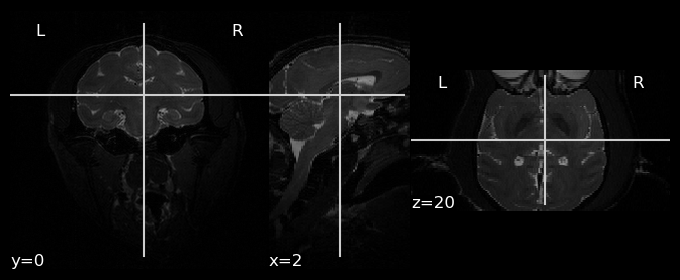

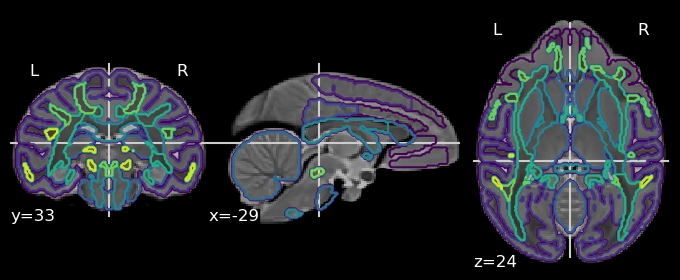

In [4]:
sub_bse_t2_orig = "/deneb_disk/macaque_atlas_data/test_data/MAC10.nii.gz"
sub_bse_t2 = "/deneb_disk/macaque_atlas_data/test_data/MAC10_pad.nii.gz"
sub_mask_t2_orig = "/deneb_disk/macaque_atlas_data/test_data/MAC10.mask.nii.gz"
sub_mask_t2 = "/deneb_disk/macaque_atlas_data/test_data/MAC10_pad.mask.nii.gz"

atlas_bse_t2 = "/deneb_disk/macaque_atlas_data/macaque_atlas/ONPRC18_atlas_v1/ONPRC18_Templates/ONPRC18_T2W_brain.nii.gz"
atlas_labels = "/deneb_disk/macaque_atlas_data/macaque_atlas/ONPRC18_atlas_v1/ONPRC18_Labelmaps/ONPRC18_GrayMatterWhiteMatterLabelmap.nii.gz"

centered_atlas = "/deneb_disk/macaque_atlas_data/test_data/atlas.nii.gz"
centered_atlas_labels = "/deneb_disk/macaque_atlas_data/test_data/atlas.label.nii.gz"

lin_reg_map_file = "/deneb_disk/macaque_atlas_data/test_data/lin_ddf.nii.gz"

centered_atlas_linreg = "/deneb_disk/macaque_atlas_data/test_data/atlas_lin.nii.gz"


PAD = 10

plot_anat(sub_bse_t2_orig)
d = plot_anat(atlas_bse_t2)
d.add_contours(atlas_labels, color='r')

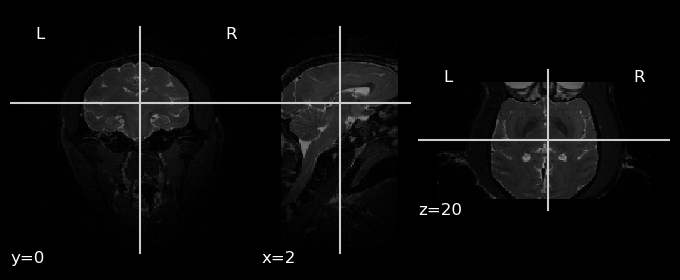

In [5]:
pad_nifti_image(sub_bse_t2_orig, sub_bse_t2, PAD)
pad_nifti_image(sub_mask_t2_orig, sub_mask_t2, PAD)
plot_anat(sub_bse_t2)

Final metric value: -0.44297766081008055
Optimizer's stopping condition, GradientDescentOptimizerv4Template: Convergence checker passed at iteration 59.


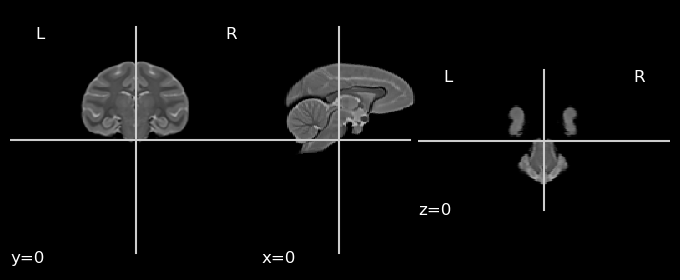

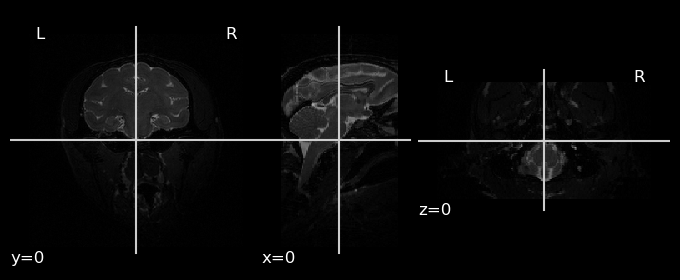

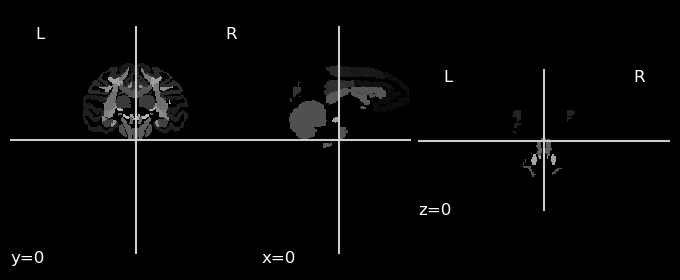

"\nreader = sitk.ImageSeriesReader()\nfixed_image = sitk.ReadImage(sub_bse_t2, sitk.sitkFloat32)\nmoving_image = sitk.ReadImage(atlas_bse_t2, sitk.sitkFloat32)\n\n\n\ngui.MultiImageDisplay(image_list = [fixed_image, moving_image],                   \n                      title_list = ['fixed image', 'moving image']);\n"

In [6]:
fixed_image = sitk.ReadImage(sub_bse_t2, sitk.sitkFloat32)
moving_image = sitk.ReadImage(atlas_bse_t2, sitk.sitkFloat32)
initial_transform = sitk.CenteredTransformInitializer(
    fixed_image,
    moving_image,
    sitk.Euler3DTransform(),
    sitk.CenteredTransformInitializerFilter.GEOMETRY,
)

final_transform, _ = multires_registration(fixed_image, moving_image, initial_transform)

moved_image = sitk.Resample(moving_image, fixed_image, final_transform)

sitk.WriteImage(moved_image, centered_atlas)

moving_image = sitk.ReadImage(atlas_labels,sitk.sitkUInt16)
moved_image = sitk.Resample(moving_image, fixed_image, transform=final_transform,interpolator=sitk.sitkNearestNeighbor)
sitk.WriteImage(moved_image, centered_atlas_labels)


plot_anat(centered_atlas, cut_coords=(0, 0, 0))
plot_anat(sub_bse_t2, cut_coords=(0, 0, 0))
plot_anat(centered_atlas_labels,cut_coords=(0,0,0))

show()


"""
reader = sitk.ImageSeriesReader()
fixed_image = sitk.ReadImage(sub_bse_t2, sitk.sitkFloat32)
moving_image = sitk.ReadImage(atlas_bse_t2, sitk.sitkFloat32)



gui.MultiImageDisplay(image_list = [fixed_image, moving_image],                   
                      title_list = ['fixed image', 'moving image']);
"""

(302, 106, 302)


/home/ajoshi/anaconda3/lib/python3.10/site-packages/nilearn/plotting/find_cuts.py:143: UserWarning: Could not determine cut coords: All voxels were masked by the thresholding. Returning the center of mass instead.
  warnings.warn(


(137, 82, 166)


TypeError: in method 'CenteredTransformInitializer', argument 1 of type 'itk::simple::Image const &'

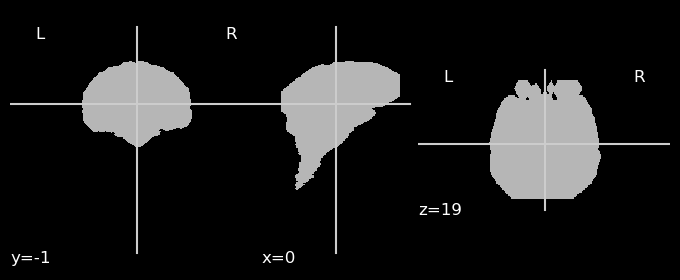

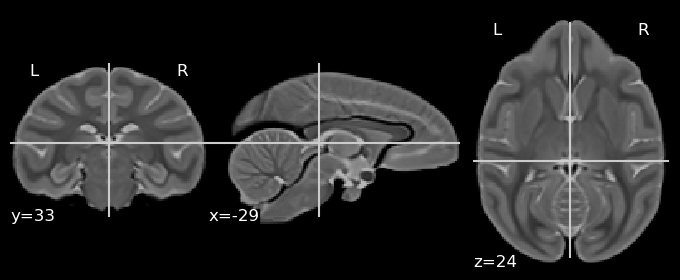

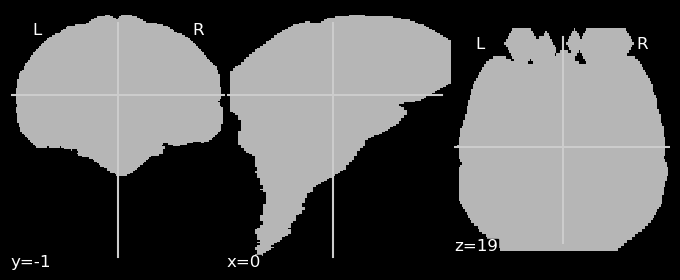

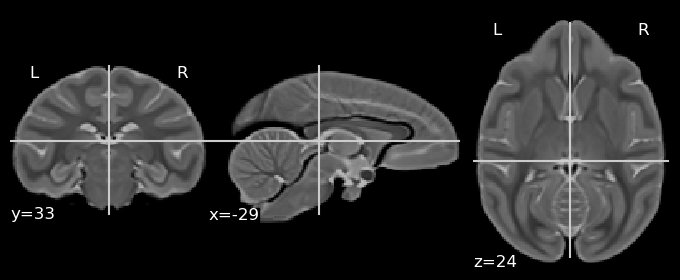

In [7]:
sub_msk = ni.load_img(sub_mask_t2)
print(sub_msk.shape)
plot_anat(sub_msk)
plot_anat(atlas_bse_t2)

sub_msk = ni.crop_img(sub_msk)
atlas = ni.crop_img(atlas_bse_t2)

print(sub_msk.shape)
plot_anat(sub_msk)
plot_anat(atlas)


fixed_image = sub_bse_t2
moving_image = atlas_bse_t2
initial_transform = sitk.CenteredTransformInitializer(
    fixed_image,
    moving_image,
    sitk.Euler3DTransform(),
    sitk.CenteredTransformInitializerFilter.GEOMETRY,
)

final_transform, _ = multires_registration(fixed_image, moving_image, initial_transform)


atlas = ni.resample_to_img(atlas, sub_msk)
plot_anat(atlas)

In [ ]:
aligner=Aligner()
aligner.affine_reg(fixed_file=sub_bse_t2, moving_file=centered_atlas, output_file=centered_atlas_linreg, ddf_file=lin_reg_map_file)

plot_anat(sub_bse_t2,cut_coords=(0,0,0))
plot_anat(centered_atlas,cut_coords=(0,0,0))
plot_anat(centered_atlas_linreg,cut_coords=(0,0,0))